In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from skimage.external.tifffile import imsave
from skimage.filters import gaussian
from Settings import load_settings

dataset_name = 'TIAM_protrusion'

data, param = load_settings(dataset_name)

# x = data.load_frame_morpho(0)
# y = gaussian(x, sigma=5, preserve_range=True)
# imsave('gaussian.tif', y.astype(np.float32), compress=6)
# imsave('thresholded.tif', (145<y).astype(np.uint8), compress=6)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def normalize(x):
    xmax = np.max(x)
    xmin = np.min(x)
    return (x-xmin)/(xmax-xmin)

In [34]:
# Small class allowing to manually interact with the plot

import ipywidgets as ipw
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, clear_output
%matplotlib notebook
from Segmentation import segment_aux

class Morphointeract:
    
    def __init__(self, data):
        
        style = {'description_width': 'initial'}
        layout = {'width': '300px'}
                
        # Time
        self.time = ipw.IntSlider(description = 'Time', min = 0, max = data.K-1, continuous_update=False)
        self.time.observe(self.update_time, names = 'value')
        
        # Threshold
        self.threshold = ipw.FloatSlider(description='Threshold', min = 50, max = 200, step = 0.1, value = 150)
        self.threshold.observe(self.update_threshold, names = 'value')
        
        # Transparency
        self.transparency = ipw.FloatSlider(description='Transparency', min = 0, max = 1, step = 0.1, value = 1)
        self.transparency.observe(self.update_alpha, names = 'value')
        
        # create output widget containing plots
#       self.out = ipw.Output()
#       with self.out:
        self.out_errors = ipw.Output()
        self.fig = plt.figure(1, figsize=(8,9/2))
        x = data.load_frame_morpho(self.time.value)
        y = segment_aux(x, 2, self.threshold.value)
        self.im = plt.imshow(np.stack((self.transparency.value*y.astype(np.float), normalize(x), np.zeros(x.shape)), axis=2))
                
    def connect(self):
        '''Connect mouse click and key press to events'''

    def update_time(self, change):
        # self.time = change['new']
        self.update_plot()
        
    def update_threshold(self, change):
        # self.threshold = change['new']
        self.update_plot()
        
    def update_alpha(self, change):
        # self.transparency = change['new']
        self.update_plot()
    
    def update_plot(self):
        '''Update plot data upon change of time or channel'''
        with self.out_errors:
            x = data.load_frame_morpho(self.time.value)
            y = segment_aux(x, 2, self.threshold.value)
            self.im.set_data(np.stack((self.transparency.value*y.astype(np.float), normalize(x), np.zeros(x.shape)), axis=2))
  

<IPython.core.display.Javascript object>


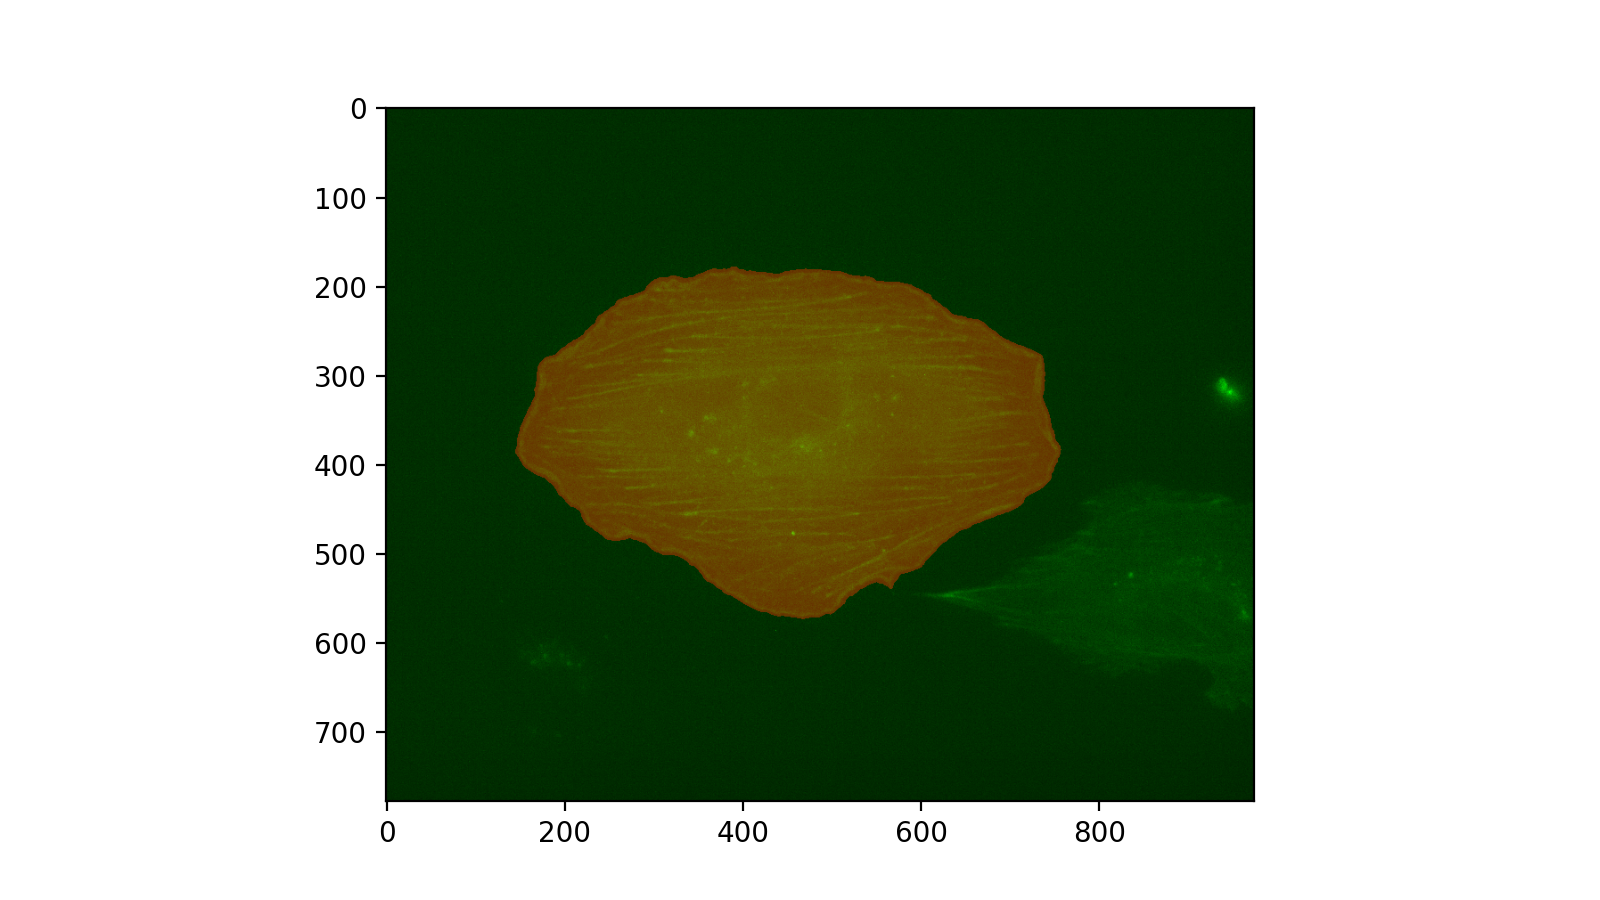

IntSlider(value=0, continuous_update=False, description='Time', max=65)

FloatSlider(value=1.0, description='Transparency', max=1.0)

FloatSlider(value=150.0, description='Threshold', max=200.0, min=50.0)

<IPython.core.display.Javascript object>


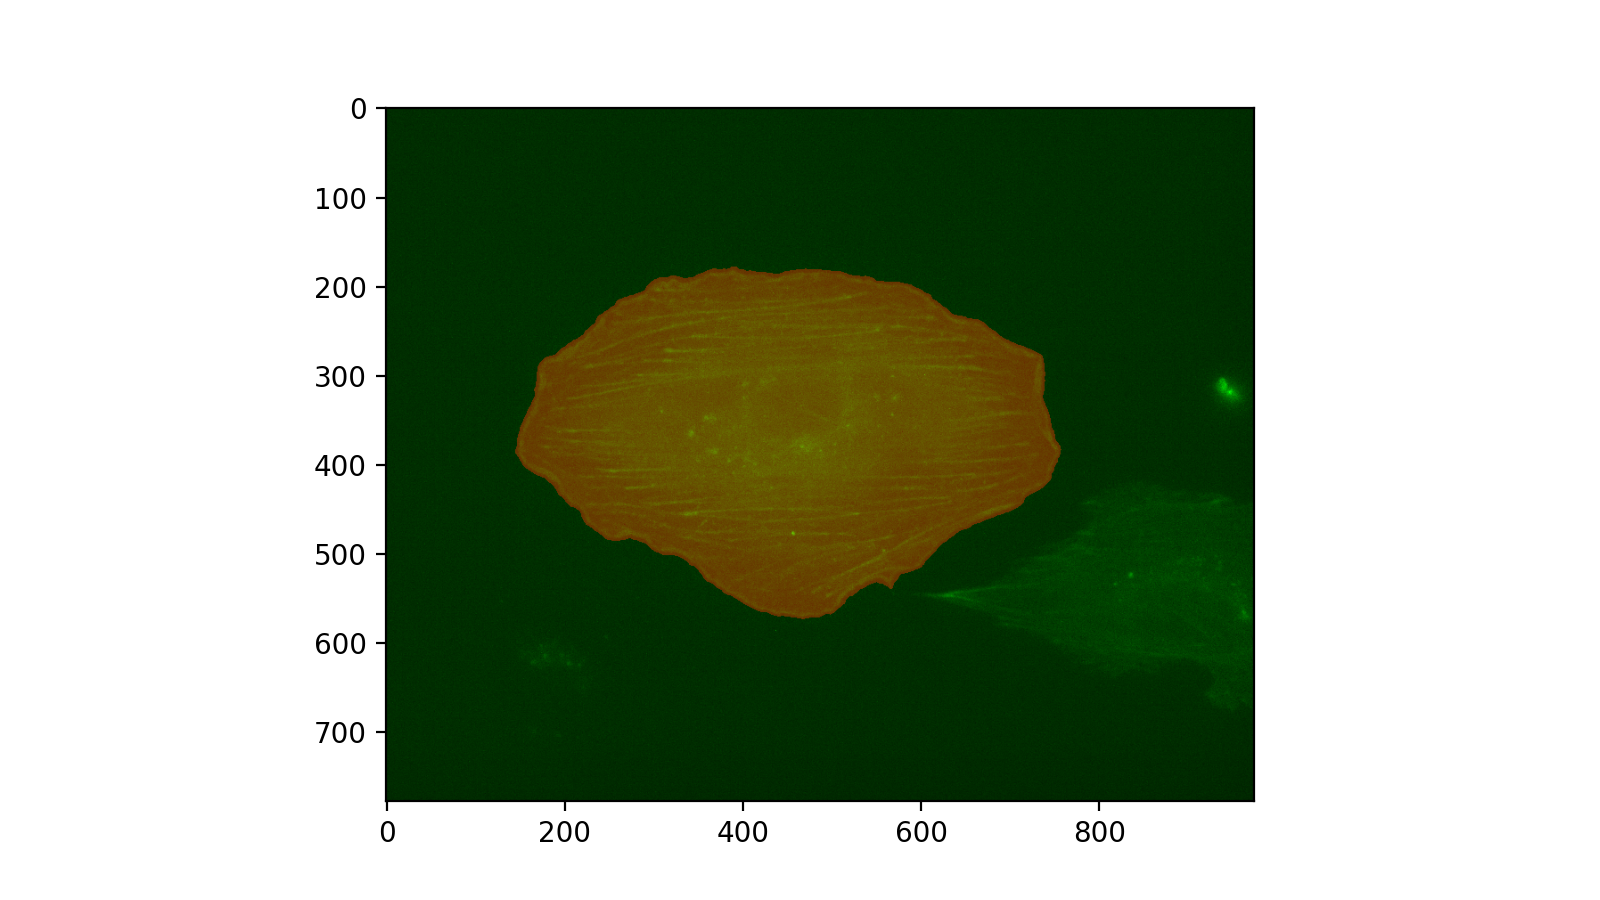

stop


In [35]:
mi = Morphointeract(data)
mi.connect()

#clear_output(wait=True)
#ipw.VBox([mi.time_slider,ipw.HBox([mi.out, mi.channel])])
display(mi.time, mi.transparency, mi.threshold, mi.fig)
print('stop')

In [24]:
from Segmentation import segment_aux
y = segment_aux(data.load_frame_morpho(0), 2, 100, None)

In [7]:
x = data.load_frame_morpho(0)
y = segment_aux(x, 2, 150)
print(x.shape)
print(y.shape)

(778, 974)
(778, 974)


In [33]:
mi.out_errors

Output(outputs=({'output_type': 'error', 'ename': 'ValueError', 'evalue': 'attempt to get argmax of an empty s…